In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r"D:\My Download\shopping_behavior_updated.csv")

In [7]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


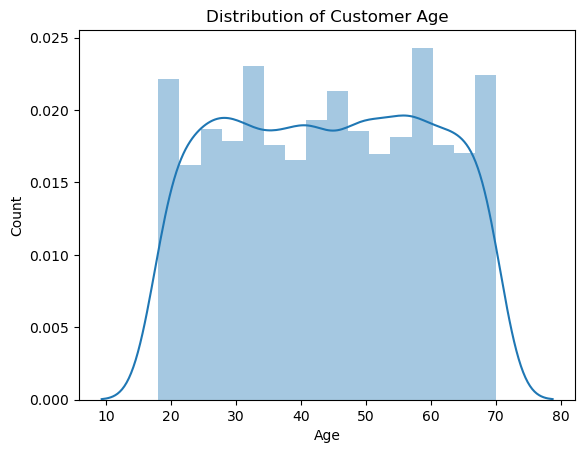

In [9]:
# Create a histogram of the age column
sns.distplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Age')
plt.show()


In [10]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [11]:
Review Rating,Previous Purchases,Age

SyntaxError: invalid syntax (3564240223.py, line 1)

<AxesSubplot:xlabel='Age', ylabel='Count'>

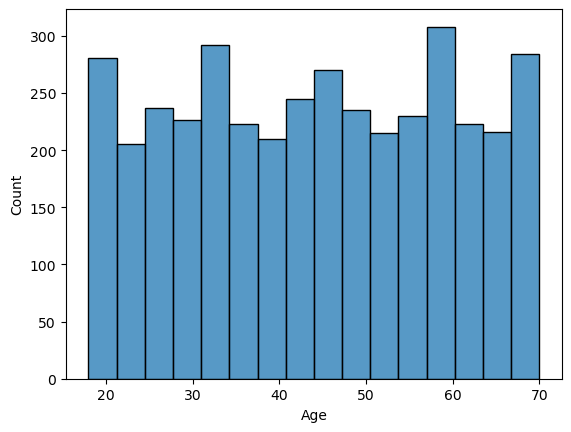

In [12]:
sns.histplot(df['Age'])

In [14]:
df.shape

(3900, 18)

In [15]:
# Identify missing values
missing_values = df.isna().sum()
print(missing_values)

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [16]:
# Calculate the correlation coefficients between variables
correlations = df.corr()
print(correlations)

                       Customer ID       Age  Purchase Amount (USD)  \
Customer ID               1.000000 -0.004079               0.011048   
Age                      -0.004079  1.000000              -0.010424   
Purchase Amount (USD)     0.011048 -0.010424               1.000000   
Review Rating             0.001343 -0.021949               0.030776   
Previous Purchases       -0.039159  0.040445               0.008063   

                       Review Rating  Previous Purchases  
Customer ID                 0.001343           -0.039159  
Age                        -0.021949            0.040445  
Purchase Amount (USD)       0.030776            0.008063  
Review Rating               1.000000            0.004229  
Previous Purchases          0.004229            1.000000  


In [ ]:
Iteam Purchase by Gender, 

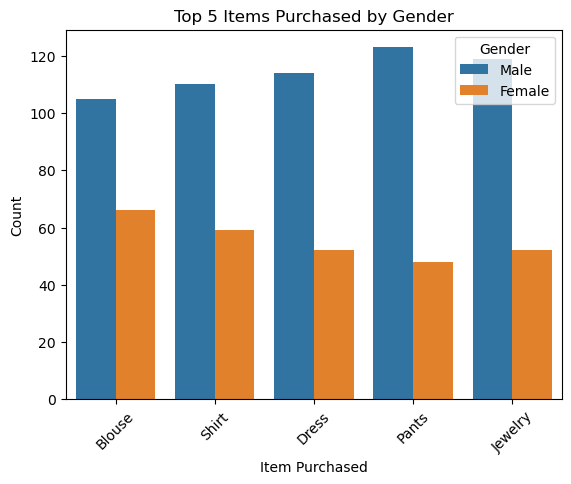

In [14]:


# Assuming df is your original DataFrame
top_items = df['Item Purchased'].value_counts().nlargest(5).index
df_top5 = df[df['Item Purchased'].isin(top_items)]

sns.countplot(
    x='Item Purchased',
    hue='Gender',
    data=df_top5
)
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.title('Top 5 Items Purchased by Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()


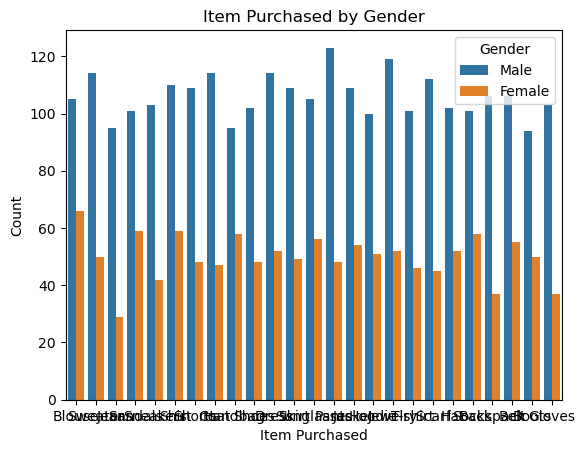

In [13]:


# Create a countplot of the `Item Purchased` column by `Gender`
sns.countplot(
    x = 'Item Purchased',
    hue = 'Gender',
    data=df
)
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.title('Item Purchased by Gender')
plt.show()

In [ ]:
Item Purchased
Age


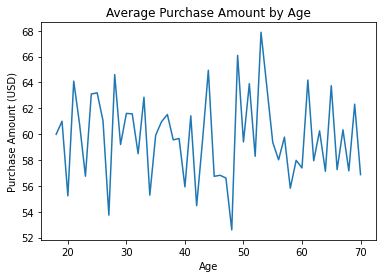

In [28]:


# Calculate the average purchase amount for each age group
average_purchase_amount_by_age = df.groupby('Age')['Purchase Amount (USD)'].mean()

# Create a line plot of the average purchase amount by age
sns.lineplot(
    x = average_purchase_amount_by_age.index,
    y = average_purchase_amount_by_age.values
)

# Set the title and axis labels
plt.title('Average Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
    
# Show the plot
plt.show()


# age and previus purchase

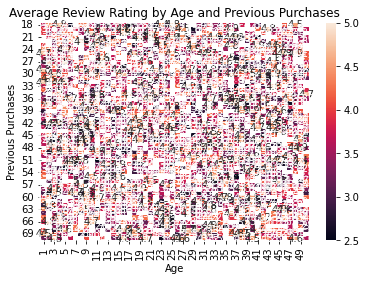

In [29]:
# Create a pivot table to calculate the average review rating by age and previous purchases
pivot_table = df.pivot_table(
    values="Review Rating",
    index="Age",
    columns="Previous Purchases",
    aggfunc=np.mean
)

# Create a heatmap of the pivot table
sns.heatmap(pivot_table, annot=True)

# Set the title and axis labels
plt.title('Average Review Rating by Age and Previous Purchases')
plt.xlabel('Age')
plt.ylabel('Previous Purchases')

# Show the plot
plt.show()

In [ ]:
Frequency of Purchases
Location
Season  Fall summer winter spring
Category
make a analysys chart using for column ok for analysys wich season hight purchase and lowest purchse season name ?and location 

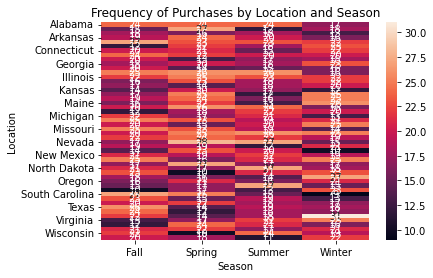

In [35]:
# Create a pivot table of the number of purchases by location and season
pivot_table = df.pivot_table(
    index="Location",
    columns="Season",
    values="Purchase Amount (USD)",
    aggfunc="count"
)

# Create a heatmap of the pivot table
sns.heatmap(pivot_table, annot=True)

# Set the title and axis labels
plt.title('Frequency of Purchases by Location and Season')
plt.xlabel('Season')
plt.ylabel('Location')

# Show the plot
plt.show()

In [37]:
# Calculate the average purchase frequency for each season
average_purchasen = pivot_table.mean(axis=0)

# Get the season with the highest and lowest purchase frequency
highest_purchase_frequency_season = average_purchasen.idxmax()
lowest_purchase_frequency_season = average_purchasen.idxmin()

# Print the results
print('The season with the highest purchase frequency is {}'.format(highest_purchase_frequency_season))
print('The season with the lowest purchase frequency is {}'.format(lowest_purchase_frequency_season))


The season with the highest purchase frequency is Spring
The season with the lowest purchase frequency is Summer


In [40]:
print(df.dtypes)

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object


In [ ]:
item Purchased ,Location 

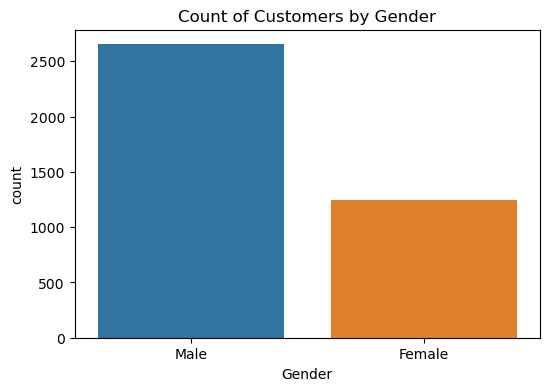

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Count of Customers by Gender')
plt.show()


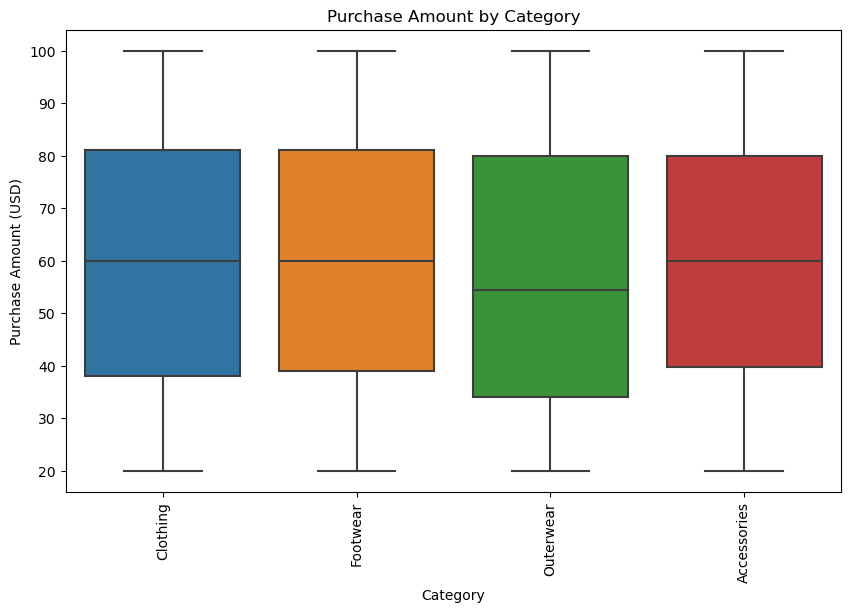

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Purchase Amount (USD)')
plt.title('Purchase Amount by Category')
plt.xticks(rotation=90)
plt.show()


 Scatterplot of Age vs. Review Rating

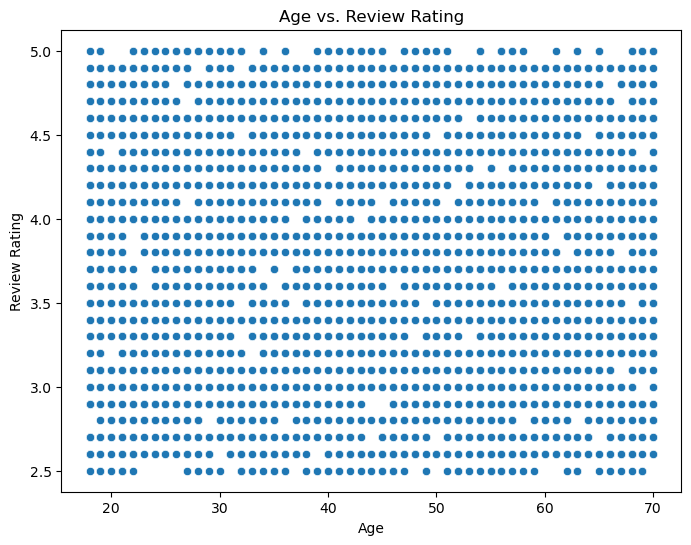

In [21]:
plt.figure(figsize =(8, 6))
sns.scatterplot(data=df, x='Age',y='Review Rating')
plt.title('Age vs. Review Rating')
plt.show()

Barplot of Average Purchase Amount by Location

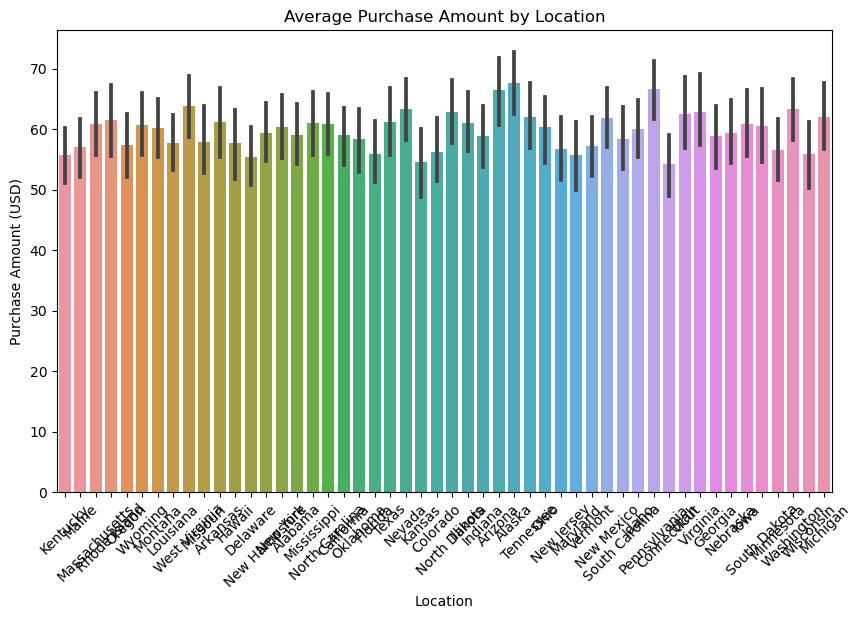

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Location', y='Purchase Amount (USD)', estimator=np.mean)
plt.title('Average Purchase Amount by Location')
plt.xticks(rotation=45)
plt.show()


In [ ]:
Boxplot of Purchase Amount by Size

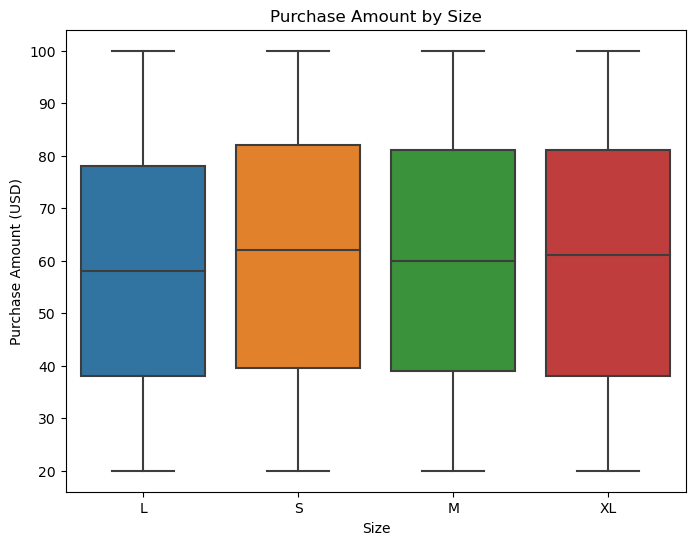

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Size', y='Purchase Amount (USD)')
plt.title('Purchase Amount by Size')
plt.show()


Countplot of Subscription Status by Gender


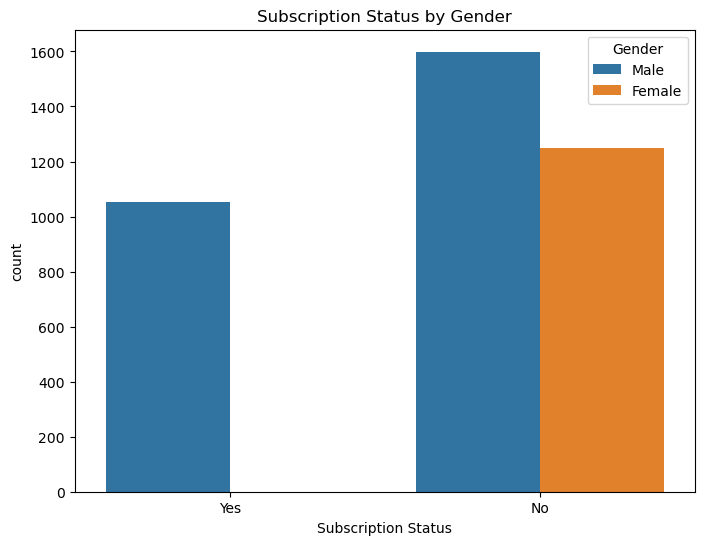

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Subscription Status', hue='Gender')
plt.title('Subscription Status by Gender')
plt.show()


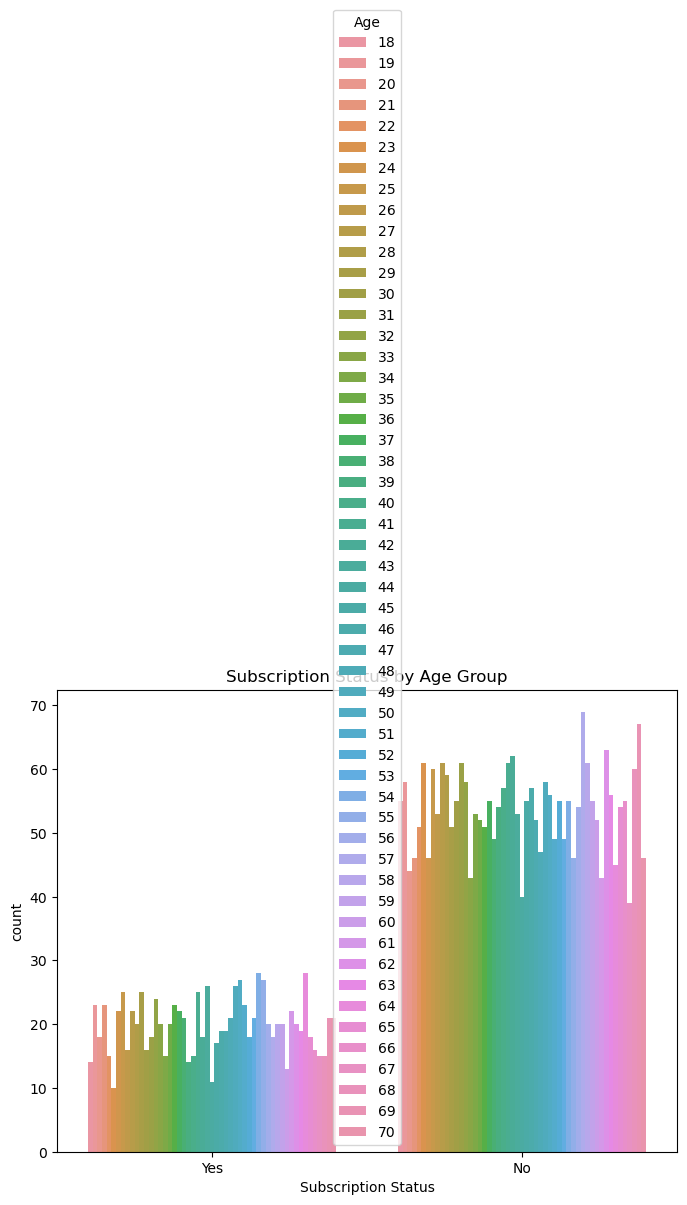

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Subscription Status', hue='Age')
plt.title('Subscription Status by Age Group')
plt.show()


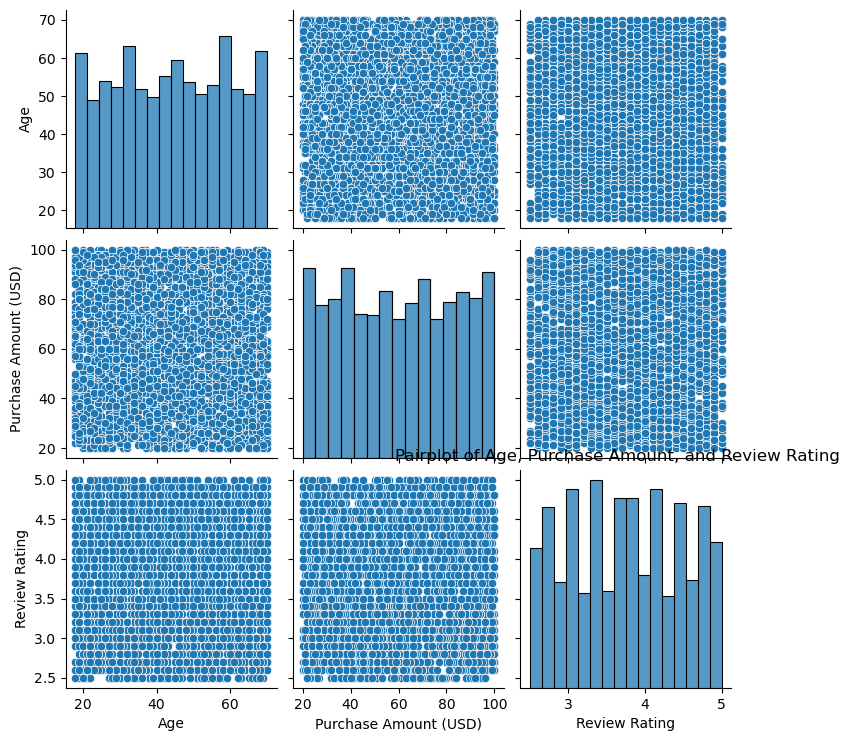

In [29]:
sns.pairplot(data=df[['Age', 'Purchase Amount (USD)', 'Review Rating'     ]])
plt.title('Pairplot of Age, Purchase Amount, and Review Rating   ')
plt.show()


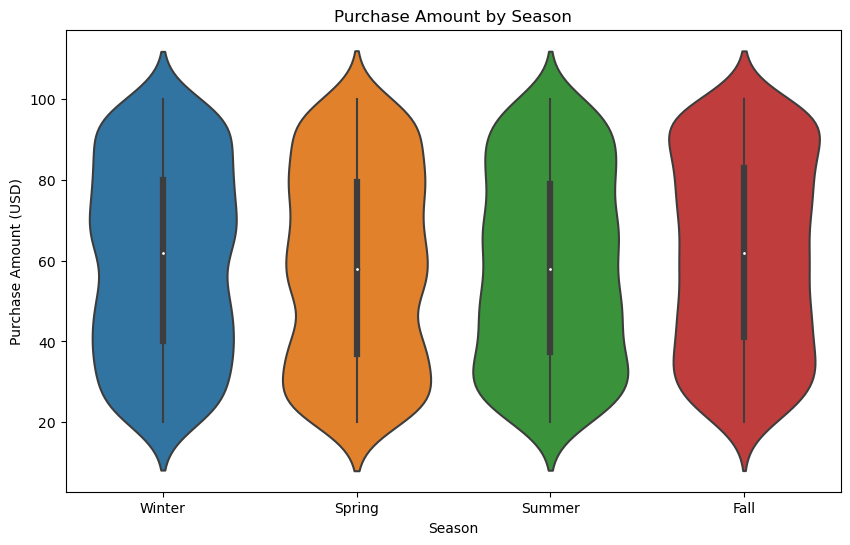

In [31]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Season', y='Purchase Amount (USD)')
plt.title('Purchase Amount by Season')
plt.show()


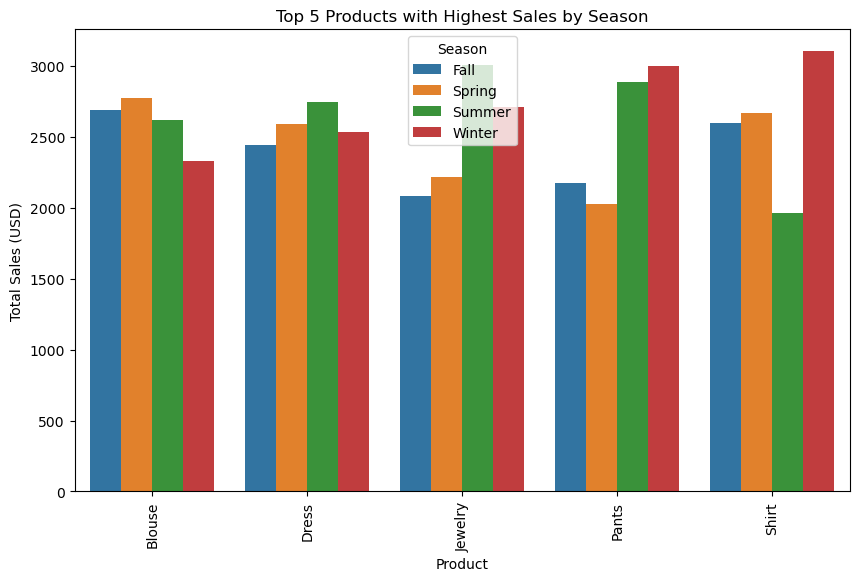

In [37]:
product_season_sales = df.groupby(['Item Purchased', 'Season'])['Purchase Amount (USD)'].sum().reset_index()

# Find the top 5 products with highest total sales
top_5_products = product_season_sales.groupby('Item Purchased')['Purchase Amount (USD)'].sum().nlargest(5).index

# Filter the DataFrame to include only the top 5 products
top_5_product_season_sales = product_season_sales[product_season_sales['Item Purchased'].isin(top_5_products)]

# Create a barplot to visualize the top 5 products with highest sales in each season
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_product_season_sales, x='Item Purchased', y='Purchase Amount (USD)', hue='Season')
plt.title('Top 5 Products with Highest Sales by Season')
plt.xlabel('Product')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=90)
plt.show()